In [9]:
from dataset import load_train
import pandas as pd

In [10]:
data = load_train()
test_data = pd.read_csv("../data/test.csv")

In [3]:
def preprocess_surname(data):
    preds_csv_path = 'surname_predictions.csv'
    preds = pd.read_csv(preds_csv_path, header=None, names=["Surname", "raw_pred"])

    preds["pred_id"] = preds["raw_pred"].str.extract(r"\((\d+),")[0]

    preds = preds[["Surname", "pred_id"]]
    data['Surname_Coutry'] = pd.NA
    preds_dict = preds.set_index('Surname')["pred_id"].to_dict()
    for i in range(len(data)):
        # print(data.at[i, "Surname"], "to", preds_dict[data.at[i, "Surname"]], end= "\n")
        data.at[i, "Surname_Coutry"] = int(preds_dict[data.at[i, "Surname"]])
    # print(data["Surname"])
    data['Surname_Coutry'] = data['Surname_Coutry'].astype(int)
    data.info()
    return data

In [19]:
pip install rapidfuzz

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.1/3.1 MB 1.6 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [20]:
from rapidfuzz import fuzz, process

unique_surnames = data['Surname'].unique()

# –ü—Ä–∏–º–µ—Ä: –Ω–∞–π—Ç–∏ –≤—Å–µ —Ñ–∞–º–∏–ª–∏–∏, –ø–æ—Ö–æ–∂–∏–µ –Ω–∞ "Ivanov"
similar = process.extract("Miah", unique_surnames, scorer=fuzz.ratio, limit=10)
print(similar)

[('Miah', 100.0, 585), ('Ma', 66.66666666666667, 399), ('Milani', 60.0, 33), ('Milano', 60.0, 92), ('Mao', 57.14285714285714, 35), ('Mai', 57.14285714285714, 531), ('Maughan', 54.54545454545454, 69), ('Liao', 50.0, 5), ('Hsia', 50.0, 24), ('Milanesi', 50.0, 73)]


In [12]:
data = preprocess_surname(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
 14  Surname_Coutry   15000 non-null  int64  
dtypes: float64(10), int64(2), object(3)
memory usage: 1.7+ MB


In [21]:
unique_surnames = data['Surname'].dropna().unique().tolist()

surname_map = {}

processed = set()

for i, name in enumerate(unique_surnames):
    if name in processed:
        continue
    group = [name]
    for other in unique_surnames[i+1:]:
        if other in processed:
            continue
        score = fuzz.ratio(name, other)
        if score > 60:
            group.append(other)
            processed.add(other)
    for member in group:
        surname_map[member] = name
    processed.add(name)

data['Surname'] = data['Surname'].replace(surname_map)

In [26]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(data['Surname'], data['Exited'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f'p-value: {p:.4e}')

p-value: 1.8322e-36


In [23]:
country_stats = data.groupby('Surname')['Exited'].agg(
    conversion_rate='mean',
    count='size'
).reset_index().sort_values('conversion_rate', ascending=False)
print(country_stats)


           Surname  conversion_rate  count
336            Wei              1.0      1
312     Titheradge              1.0      1
313      Tobeolisa              1.0      1
19            Bess              1.0      1
278            Pye              1.0      1
..             ...              ...    ...
329  Ugonnatubelum              0.0      1
1        Aikenhead              0.0      2
2          Akeroyd              0.0      1
0           Achebe              0.0      1
362           Zuev              0.0      3

[363 rows x 3 columns]


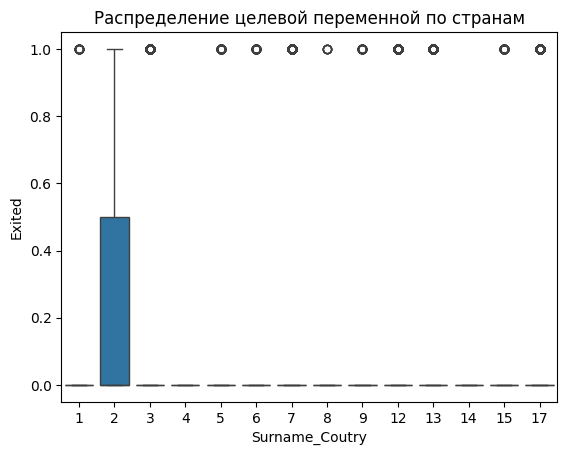

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Surname_Coutry', y='Exited', data=data)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –ø–æ —Å—Ç—Ä–∞–Ω–∞–º')
plt.show()

In [54]:
full_data = pd.concat([data, test_data], ignore_index=True)


In [55]:
data = full_data
data

id  CustomerId         Surname  CreditScore Geography  Gender   Age  \
0          0  15752626.0          Martin        675.0    France  Female  48.0   
1          1  15797960.0        Pagnotto        673.0    France  Female  37.0   
2          2  15672056.0            T'an        607.0    France    Male  29.0   
3          3  15733169.0  Chukwufumnanya        669.0    France  Female  28.0   
4          4  15795519.0           Hsing        743.0    France    Male  24.0   
...      ...         ...             ...          ...       ...     ...   ...   
24995  24995  15575498.0        Chizuoke        705.0     Spain  Female  38.0   
24996  24996  15709135.0        Iloerika        711.0   Germany  Female  37.0   
24997  24997  15752312.0          Wilson        584.0   Germany  Female  43.0   
24998  24998  15603035.0             Hs?        652.0     Spain    Male  57.0   
24999  24999  15593969.0  Okwudilichukwu        633.0    France  Female  31.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0         7.0  143582.89            2.0        0.0             0.0   
1         7.0       0.00            2.0        0.0             0.0   
2         4.0       0.00            2.0        0.0             1.0   
3         2.0       0.00            2.0        1.0             0.0   
4         7.0       0.00            2.0        1.0             0.0   
...       ...        ...            ...        ...             ...   
24995     8.0       0.00            1.0        0.0             0.0   
24996     8.0  117565.03            2.0        1.0             0.0   
24997     1.0  106804.26            3.0        1.0             0.0   
24998     3.0  113292.14            1.0        0.0             1.0   
24999     9.0       0.00            2.0        1.0             1.0   

       EstimatedSalary  Exited  
0             93844.82     1.0  
1            170980.86     0.0  
2             61290.99     0.0  
3             97734.30     0.0  
4            180800.42     0.0  
...                ...     ...  
24995        186489.14     NaN  
24996         51112.80     NaN  
24997        119327.75     NaN  
24998         44912.60     NaN  
24999         46677.90     NaN  

[25000 rows x 14 columns]

In [57]:
len(data["Surname"].unique())

838

In [58]:
list(data["Surname"].unique())

['Martin',
 'Pagnotto',
 "T'an",
 'Chukwufumnanya',
 'Hsing',
 'Liao',
 'Maclean',
 'Lu',
 'Nwachinemelu',
 'Kline',
 'Udinese',
 'Nwabugwu',
 'Nott',
 'Lucciano',
 'Tien',
 'K?',
 'Chidubem',
 'Nwoye',
 'H?',
 'Walker',
 'Houghton',
 'Yermakov',
 'Macintyre',
 'Zetticci',
 'Hsia',
 'Milne',
 'Chukwualuka',
 'Zikoranachidimma',
 "Ch'eng",
 'Ugoji',
 'Lo Duca',
 'Chiazagomekpere',
 'Chibuzo',
 'Milani',
 'Hsiung',
 'Mao',
 'Tuan',
 "Ch'in",
 'Hs?',
 'Nwachukwu',
 'Nnamutaezinwa',
 'Cavenagh',
 'Genovese',
 "T'ang",
 'Onyekachukwu',
 'Chidumaga',
 'Ikedinachukwu',
 'Onuora',
 'Palermo',
 'Chin',
 'Tsou',
 'Onyemauchechukwu',
 'Smith',
 'Lucchese',
 'Nwankwo',
 'Toscani',
 'Lo',
 'Clements',
 "T'ien",
 "Ch'iu",
 'Li Fonti',
 'Chuter',
 "Ts'ui",
 'Nwokezuike',
 'Chiedozie',
 'Chuang',
 'Nwora',
 'Pugh',
 'Hsiao',
 'Maughan',
 "Ts'ao",
 'Chigolum',
 'Ting',
 'Milanesi',
 'Palerma',
 'Chikezie',
 'Kuo',
 'Chukwudi',
 'Shih',
 'Lipton',
 "T'ao",
 'Ugochukwu',
 "Ch'en",
 'Ndubueze',
 'Hsieh',


In [59]:
data["Surname"].sample(25)

16776              Hsia
11755               Hs?
17120    Okwudilichukwu
12092             Brown
21345             T'ien
18980          Chinedum
2033               Chiu
8718             Nnamdi
8840             Hsiung
16105            Farrar
19599        Kenechukwu
6102           Padovano
21241          Chibueze
21069             Hsieh
12421         Udegbunam
3224              Manna
6357               Y?an
7256                 Y?
10874            Chiang
574                P'an
10366          Lucchesi
20116         Okechukwu
24351            Ch'ang
11952           Yobanna
7677      Iweobiegbunam
Name: Surname, dtype: object

In [105]:
data["Surname"].unique()

array(['Martin', 'Pagnotto', "T'an", 'Chukwufumnanya', 'Hsing', 'Liao',
       'Maclean', 'Lu', 'Nwachinemelu', 'Kline', 'Udinese', 'Nwabugwu',
       'Nott', 'Lucciano', 'Tien', 'K?', 'Chidubem', 'Nwoye', 'H?',
       'Walker', 'Houghton', 'Yermakov', 'Macintyre', 'Zetticci', 'Hsia',
       'Milne', 'Chukwualuka', 'Zikoranachidimma', "Ch'eng", 'Ugoji',
       'Lo Duca', 'Chiazagomekpere', 'Chibuzo', 'Milani', 'Hsiung', 'Mao',
       'Tuan', "Ch'in", 'Hs?', 'Nwachukwu', 'Nnamutaezinwa', 'Cavenagh',
       'Genovese', "T'ang", 'Onyekachukwu', 'Chidumaga', 'Ikedinachukwu',
       'Onuora', 'Palermo', 'Chin', 'Tsou', 'Onyemauchechukwu', 'Smith',
       'Lucchese', 'Nwankwo', 'Toscani', 'Lo', 'Clements', "T'ien",
       "Ch'iu", 'Li Fonti', 'Chuter', "Ts'ui", 'Nwokezuike', 'Chiedozie',
       'Chuang', 'Nwora', 'Pugh', 'Hsiao', 'Maughan', "Ts'ao", 'Chigolum',
       'Ting', 'Milanesi', 'Palerma', 'Chikezie', 'Kuo', 'Chukwudi',
       'Shih', 'Lipton', "T'ao", 'Ugochukwu', "Ch'en", 'Ndubuez

In [106]:
surnames = pd.DataFrame({"Surname": data["Surname"].unique()})

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –≤ CSV
surnames.to_csv("names.csv", index=False)

In [62]:
import pandas as pd
import requests
import time

def get_nationalities(surnames, batch_size=10, delay=1.5):
    results = []
    for i in range(0, len(surnames), batch_size):
        batch = surnames[i:i+batch_size]
        query_params = "&".join([f"name[]={name}" for name in batch])
        print(query_params)
        url = f"https://api.nationalize.io/?{query_params}&apikey=70f488dc8f235fc6cdab0825dc65ad52"

        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error for batch {batch[0]}: {response.status_code}")
            continue

        results.extend(response.json())
        time.sleep(delay)
    return results

# –ü—Ä–∏–º–µ—Ä
surnames = list(data["Surname"].unique())
results = get_nationalities(surnames)

# –°–æ—Ö—Ä–∞–Ω—è–µ–º
df_nationalities = pd.json_normalize(results, 'country', ['name', 'count'])
df_nationalities.to_csv("surname_nationalities.csv", index=False)


name[]=Martin&name[]=Pagnotto&name[]=T'an&name[]=Chukwufumnanya&name[]=Hsing&name[]=Liao&name[]=Maclean&name[]=Lu&name[]=Nwachinemelu&name[]=Kline
Error for batch Martin: 402
name[]=Udinese&name[]=Nwabugwu&name[]=Nott&name[]=Lucciano&name[]=Tien&name[]=K?&name[]=Chidubem&name[]=Nwoye&name[]=H?&name[]=Walker
Error for batch Udinese: 402
name[]=Houghton&name[]=Yermakov&name[]=Macintyre&name[]=Zetticci&name[]=Hsia&name[]=Milne&name[]=Chukwualuka&name[]=Zikoranachidimma&name[]=Ch'eng&name[]=Ugoji


KeyboardInterrupt: 

In [64]:
len(data["Surname"].dropna().unique())

838

In [101]:
data["Surname"].dropna().unique()[220]

'Trevisani'

In [100]:
import requests
import pandas as pd
import time
import os
API_KEY = 'cd96d8e437c8fbc3807765d5268f1f20'  # üîÅ ‚Üê —Å—é–¥–∞ –≤—Å—Ç–∞–≤—å —Å–≤–æ–π –∫–ª—é—á
BASE_URL = 'https://v2.namsor.com/NamSorAPIv2'
SAVE_PATH = "surname_nationalities.csv"
def get_nationality(surname):
    url = f"https://v2.namsor.com/NamSorAPIv2/api2/json/origin/last/{surname}"
    headers = {
        "X-API-KEY": API_KEY,
        "Accept": "application/json"
    }
    response = requests.get(url, headers=headers)
    print(response.text)

    if response.status_code == 200:
        result = response.json()
        return {
            "Surname": surname,
            "CountryOrigin": result.get("countryOrigin"),
            "Score": result.get("score"),
            "RegionOrigin": result.get("regionOrigin")
        }
    else:
        print(f"‚ùå Error {response.status_code} for {surname}")
        return {
            "Surname": surname,
            "CountryOrigin": None,
            "Score": None,
            "RegionOrigin": None
        }


df = pd.read_csv("../data/train.csv")
unique_surnames = data["Surname"].dropna().unique()

if os.path.exists(SAVE_PATH):
    existing_df = pd.read_csv(SAVE_PATH)
    processed_names = set(existing_df["Surname"].unique())
else:
    existing_df = pd.DataFrame()
    processed_names = set()

remaining_names = [name for name in unique_surnames if name not in processed_names]

results = []
for i, name in enumerate(remaining_names, 1):
    res = get_nationality(name)
    if res["RegionOrigin"] == None:
        break
    results.append(res)
    print(f"{i}/{len(remaining_names)} - {res}")
    time.sleep(0.6)
    pd.DataFrame(results).to_csv(SAVE_PATH, mode='a', index=False, header=False)
    results = []



{"script":"LATIN","id":"8aafe4cb-5f89-4b28-ae95-74c1c3da6b70","firstName":"last","lastName":"Hsu","countryOrigin":"TW","countryOriginAlt":"CN","countriesOriginTop":["TW","CN","HK","MM","BN","NA","MW","GH","ID","LR"],"score":14.719968549264802,"regionOrigin":"Asia","topRegionOrigin":"Asia","subRegionOrigin":"Eastern Asia","probabilityCalibrated":0.879852749980935,"probabilityAltCalibrated":0.8838113279730683}
1/728 - {'Surname': 'Hsu', 'CountryOrigin': 'TW', 'Score': 14.719968549264802, 'RegionOrigin': 'Asia'}
{"script":"LATIN","id":"5ab6c495-89df-4eec-9767-003fa46fc6dd","firstName":"last","lastName":"Pisano","countryOrigin":"ZW","countryOriginAlt":"IT","countriesOriginTop":["ZW","IT","BW","MW","TZ","IL","ZM","NA","FR","ID"],"score":7.064679395153411,"regionOrigin":"Africa","topRegionOrigin":"Africa","subRegionOrigin":"Eastern Africa","probabilityCalibrated":0.6853925134011322,"probabilityAltCalibrated":0.8891418904065578}
2/728 - {'Surname': 'Pisano', 'CountryOrigin': 'ZW', 'Score': 7.

In [80]:
results2 = [
    r for r in results
    if r.get("RegionOrigin") not in [None, "None"]
]


In [93]:
len(results2)

96

In [95]:
import os
output_path = "surname_nationalities.csv"

results_df = pd.DataFrame(results2)
results_df.to_csv(output_path, mode='a', index=False, header=not os.path.exists(output_path))
print(f"‚úÖ –î–æ–±–∞–≤–ª–µ–Ω–æ {len(results_df)} –∑–∞–ø–∏—Å–µ–π –≤ {output_path}")

‚úÖ –î–æ–±–∞–≤–ª–µ–Ω–æ 96 –∑–∞–ø–∏—Å–µ–π –≤ surname_nationalities.csv


In [ ]:
results_df = pd.DataFrame(results)
results_df.to_csv(output_path, mode='a', index=False, header=not os.path.exists(output_path))
print(f"‚úÖ –î–æ–±–∞–≤–ª–µ–Ω–æ {len(results_df)} –∑–∞–ø–∏—Å–µ–π –≤ {output_path}"

In [6]:
te = data.groupby('Surname')['Exited'].mean()
data['Surname_te'] = data['Surname'].map(te)

In [19]:
data['Exited']==1

0         True
1        False
2        False
3        False
4        False
         ...  
14995    False
14996     True
14997    False
14998     True
14999    False
Name: Exited, Length: 15000, dtype: bool

In [6]:
import nbformat
print(nbformat.__version__)


5.10.4


In [42]:
import plotly.express as px
import numpy as np


fig = px.histogram(data["CreditScore"], nbins=50, marginal="box", opacity=1)
fig.update_layout(title="Interactive Distribution Plot")
fig.show()

In [43]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=["Balance", "CreditScore"])

# –ü–µ—Ä–≤—ã–π –≥—Ä–∞—Ñ–∏–∫: CreditScore
fig.add_trace(
    go.Histogram(x=data["Balance"], nbinsx=30, name="Balance", marker=dict(color='blue')),
    row=1, col=1
)

# –í—Ç–æ—Ä–æ–π –≥—Ä–∞—Ñ–∏–∫: Age
fig.add_trace(
    go.Histogram(x=data["CreditScore"], nbinsx=30, name="CreditScore", marker=dict(color='green')),
    row=1, col=2
)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è
fig.update_layout(
    title_text="–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: CreditScore –∏ Age",
    showlegend=False,
    width=1000,
    height=400
)

fig.show()


In [44]:
data

id         Surname  CreditScore   Age  Tenure    Balance  \
0          0          Martin        675.0  48.0     7.0  143582.89   
1          1        Pagnotto        673.0  37.0     7.0       0.00   
2          2            T'an        607.0  29.0     4.0       0.00   
3          3  Chukwufumnanya        669.0  28.0     2.0       0.00   
4          4           Hsing        743.0  24.0     7.0       0.00   
...      ...             ...          ...   ...     ...        ...   
14995  14995          Chuang        624.0  37.0     4.0       0.00   
14996  14996       Udegbulam        796.0  42.0     1.0  132944.01   
14997  14997         Nwankwo        664.0  24.0     9.0  118098.62   
14998  14998           Greco        587.0  42.0     6.0  121263.62   
14999  14999         Udinese        637.0  31.0     3.0  139872.81   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                2.0        0.0             0.0         93844.82     1.0   
1                2.0        0.0             0.0        170980.86     0.0   
2                2.0        0.0             1.0         61290.99     0.0   
3                2.0        1.0             0.0         97734.30     0.0   
4                2.0        1.0             0.0        180800.42     0.0   
...              ...        ...             ...              ...     ...   
14995            1.0        1.0             1.0         91830.75     0.0   
14996            1.0        1.0             0.0         18922.18     1.0   
14997            2.0        1.0             1.0        121402.53     0.0   
14998            1.0        0.0             0.0        119377.44     1.0   
14999            1.0        1.0             1.0        124615.59     0.0   

       Geography_Germany  Geography_Spain  Gender_Male  Surname_te  
0                  False            False        False    0.542373  
1                  False            False        False    0.148148  
2                  False            False         True    0.090909  
3                  False            False        False    0.166667  
4                  False            False         True    0.317073  
...                  ...              ...          ...         ...  
14995              False            False        False    0.161290  
14996               True            False        False    0.135135  
14997               True            False        False    0.219298  
14998               True            False         True    1.000000  
14999              False            False        False    0.538462  

[15000 rows x 15 columns]

In [45]:
cat_features = ["Geography", "Gender", "Surname"]
num_features = [col for col in data.columns if col not in cat_features]


In [46]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

n = len(num_features)
n_cols = 2
n_rows = (n + 1) // n_cols

fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=num_features)

for idx, feature in enumerate(num_features):
    row = idx // n_cols + 1
    col = idx % n_cols + 1

    fig.add_trace(
        go.Histogram(x=data[feature], nbinsx=50, name=feature, opacity=1),
        row=row,
        col=col
    )

# –û–±—â–∏–π –≤–∏–¥
fig.update_layout(
    height=300 * n_rows,
    width=1000,
    title_text="–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤",
    showlegend=False
)

fig.show()


In [47]:
data = data.drop("CustomerId", axis=1)

KeyError: "['CustomerId'] not found in axis"

In [ ]:
data = data.drop("Surname", axis=1)

In [ ]:
data = pd.get_dummies(data, columns=["Geography", "Gender"], drop_first=True)

In [ ]:
data

id         Surname  CreditScore   Age  Tenure    Balance  \
0          0          Martin        675.0  48.0     7.0  143582.89   
1          1        Pagnotto        673.0  37.0     7.0       0.00   
2          2            T'an        607.0  29.0     4.0       0.00   
3          3  Chukwufumnanya        669.0  28.0     2.0       0.00   
4          4           Hsing        743.0  24.0     7.0       0.00   
...      ...             ...          ...   ...     ...        ...   
14995  14995          Chuang        624.0  37.0     4.0       0.00   
14996  14996       Udegbulam        796.0  42.0     1.0  132944.01   
14997  14997         Nwankwo        664.0  24.0     9.0  118098.62   
14998  14998           Greco        587.0  42.0     6.0  121263.62   
14999  14999         Udinese        637.0  31.0     3.0  139872.81   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                2.0        0.0             0.0         93844.82     1.0   
1                2.0        0.0             0.0        170980.86     0.0   
2                2.0        0.0             1.0         61290.99     0.0   
3                2.0        1.0             0.0         97734.30     0.0   
4                2.0        1.0             0.0        180800.42     0.0   
...              ...        ...             ...              ...     ...   
14995            1.0        1.0             1.0         91830.75     0.0   
14996            1.0        1.0             0.0         18922.18     1.0   
14997            2.0        1.0             1.0        121402.53     0.0   
14998            1.0        0.0             0.0        119377.44     1.0   
14999            1.0        1.0             1.0        124615.59     0.0   

       Geography_Germany  Geography_Spain  Gender_Male  
0                  False            False        False  
1                  False            False        False  
2                  False            False         True  
3                  False            False        False  
4                  False            False         True  
...                  ...              ...          ...  
14995              False            False        False  
14996               True            False        False  
14997               True            False        False  
14998               True            False         True  
14999              False            False        False  

[15000 rows x 14 columns]

In [ ]:
y = data["Exited"]
X = data.drop("Exited", axis=1)    

In [ ]:
y

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14995    0.0
14996    1.0
14997    0.0
14998    1.0
14999    0.0
Name: Exited, Length: 15000, dtype: float64

In [ ]:
sample  = pd.read_csv("../data/sample_submission.csv")

In [ ]:
sample


id  Exited
0     15000     0.5
1     15001     0.5
2     15002     0.5
3     15003     0.5
4     15004     0.5
...     ...     ...
9995  24995     0.5
9996  24996     0.5
9997  24997     0.5
9998  24998     0.5
9999  24999     0.5

[10000 rows x 2 columns]